In [1]:
import requests
import datetime

# Definir a URL da API para o endpoint de projetos
url = "https://dadosabertos.camara.leg.br/api/v2/proposicoes"

# Definir os parâmetros da requisição
data_inicio = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime("%Y-%m-%d")
data_fim = datetime.datetime.now().strftime("%Y-%m-%d")
params = {
    "dataInicio": data_inicio,
    "dataFim": data_fim,
    "ordenarPor": "id",
    "itens": 100,  # Quantidade de itens por página
    "pagina": 1,   # Começar pela primeira página
    "siglaTipo": ["PL", "PLP", "MPV"],
}
# Definir as palavras-chave que deseja filtrar na ementa dos projetos
palavras_chave = [ 
"superendividamento",
"inadimplimento das obrigações", 
"mínimo existencial",   
"repactuação de dívidas",
"taxa de juros"
"crédito ao consumidor",
"parcelamento de dívidas",
"renegociação de dívidas"
"rotativo"
"cartão de crédito",
"crédito rural",
"crédito habitacional",
"empréstimo consignado"
"capital de giro",
"crédito para investimento",
"sistemas de informação de crédito",
"ativo problemático",
"crédito a vencer"
]

# Fazer requisições para todas as páginas de resultados
projetos = []
while True:
    # Fazer a requisição para a API
    response = requests.get(url, params=params)
    # Verificar se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Acessar o conteúdo da resposta em formato JSON
        dados = response.json()["dados"]
        # Verificar se há projetos na página atual
        if len(dados) == 0:
            break
        # Filtrar os projetos que contêm pelo menos uma palavra-chave na ementa
        projetos.extend([projeto for projeto in dados if any(palavra in projeto["ementa"].lower() for palavra in palavras_chave)])
        # Avançar para a próxima página
        params["pagina"] += 1
    else:
        print("Erro ao fazer requisição para a API:", response.status_code)
        break

# Imprimir os resultados
#for projeto in projetos:
   # print("Projeto:", projeto["siglaTipo"], " ", projeto["numero"], "/",projeto["ano"], "-", projeto["ementa"])

Projeto: PL   4620 / 2012 - Altera o art. 49 da Lei nº 8.171, de 17 de janeiro de 1991, com o objetivo de incluir como beneficiários de crédito rural as comunidades quilombolas, ribeirinhas e quebradoras de coco babaçu, atingidos por barragens e assentados da reforma agrária.
Projeto: PL   8676 / 2017 - Acrescenta Capítulo VI-A à Lei nº 4.829, de 5 de novembro de 1965, para instituir os procedimentos de prorrogação e de recomposição de débitos de crédito rural.
Projeto: PL   4347 / 2019 - Altera a Lei nº 13.606, de 9 de janeiro de 2018, para prorrogar os prazos para adesão à renegociação de dívidas de operações de crédito rural que especifica.
Projeto: PL   4927 / 2020 - Altera a redação do art. 10 da Lei 4.829/1965 para considerar inidôneo para fins de obtenção de crédito rural os condenados pelo crime previsto no 41 da Lei 9.605/1998
Projeto: PL   348 / 2021 - Institui linha especial de crédito rural
Projeto: PL   3156 / 2021 - Dispõe sobre a prevenção e combate ao Superendividamento

In [2]:
import requests
from datetime import datetime, timedelta

token = "seu_token_de_acesso_aqui"

# Definir o período de tempo desejado (última semana)
data_atual = datetime.now()
data_inicio = data_atual - timedelta(days=30)

# Percorrer a lista de proposições
for proposicao in projetos:
    id_proposicao = proposicao['id']
    
    # Fazer uma chamada ao endpoint /proposicoes/{id}/tramitacoes para obter as tramitações da proposição
    url_tramitacoes = f"https://dadosabertos.camara.leg.br/api/v2/proposicoes/{id_proposicao}/tramitacoes"
    response_tramitacoes = requests.get(url_tramitacoes, headers={"Authorization": f"Bearer {token}"})
    
    if response_tramitacoes.status_code == 200:
        tramitacoes = response_tramitacoes.json()['dados']
        
        # Obter a última tramitação da proposição
        ultima_tramitacao = tramitacoes[-1]
        
        # Extrair a situação de tramitação dessa última tramitação
        situacao_tramitacao = ultima_tramitacao['descricaoSituacao']
        
        # Adicionar a situação de tramitação à proposição
        proposicao['situacaoTramitacao'] = situacao_tramitacao
    else:
        print(f"Erro ao obter as tramitações da proposição {id_proposicao}: {response_tramitacoes.status_code}")

In [3]:
import pandas as pd

colunas = ['id', 'siglaTipo', 'numero', 'ano', 'ementa', 'situacaoTramitacao']

In [4]:
df = pd.DataFrame(projetos, columns=colunas)
df.style.set_properties(lw={0: 2})

,id,siglaTipo,numero,ano,ementa,situacaoTramitacao
0,558073,PL,4620,2012,"Altera o art. 49 da Lei nº 8.171, de 17 de janeiro de 1991, com o objetivo de incluir como beneficiários de crédito rural as comunidades quilombolas, ribeirinhas e quebradoras de coco babaçu, atingidos por barragens e assentados da reforma agrária.",Aguardando Parecer
1,2152723,PL,8676,2017,"Acrescenta Capítulo VI-A à Lei nº 4.829, de 5 de novembro de 1965, para instituir os procedimentos de prorrogação e de recomposição de débitos de crédito rural.",Aguardando Encaminhamento
2,2214197,PL,4347,2019,"Altera a Lei nº 13.606, de 9 de janeiro de 2018, para prorrogar os prazos para adesão à renegociação de dívidas de operações de crédito rural que especifica.",None
3,2264343,PL,4927,2020,Altera a redação do art. 10 da Lei 4.829/1965 para considerar inidôneo para fins de obtenção de crédito rural os condenados pelo crime previsto no 41 da Lei 9.605/1998,None
4,2269820,PL,348,2021,Institui linha especial de crédito rural,Aguardando Vistas
5,2298695,PL,3156,2021,Dispõe sobre a prevenção e combate ao Superendividamento do Consumidor e dá outras previdências.,Aguardando Parecer
6,2313849,PL,60,2022,Dispõe sobre a remissão e a prorrogação de parcelas de dívidas originárias de operações de crédito rural de responsabilidade de produtores cuja produção da safra do ciclo agrícola 2021/2022 tenha sido prejudicada em razão de excesso hídrico.,Tramitando em Conjunto
7,2317628,PL,486,2020,"Altera a Lei nº 11.326, de 24 de julho de 2006, para incluir a redução das desigualdades sociais e regionais entre os princípios a serem observados pela Política Nacional da Agricultura Familiar e Empreendimentos Familiares Rurais e determina ao poder público tratamento especial quanto a linhas de crédito rural e serviços de assistência técnica e extensão rural destinados a agricultores familiares e empreendimentos familiares rurais situados na Região do Marajó.",Pronta para Pauta
8,2336393,PL,2685,2022,"Institui o Programa Nacional de Renegociação das Dívidas das Famílias – ReFamília e estabelece a necessidade de imposição de limite aos juros cobrados na modalidade cartão de crédito rotativo. NOVA EMENTA: Institui o Programa Emergencial de Renegociação de Dívidas de Pessoas Físicas Inadimplentes - Desenrola Brasil; estabelece normas para facilitação de acesso a crédito e mitigação de riscos de inadimplemento e de superendividamento de pessoas físicas; altera a Consolidação das Leis do Trabalho, aprovada pelo Decreto-Lei nº 5.452, de 1º de maio de 1943, e as Leis nºs 10.406, de 10 de janeiro de 2002 (Código Civil), 10.522, de 19 de julho de 2002 e 12.087, de 11 de novembro de 2009; e revoga dispositivo da Lei nº 4.737, de 15 de julho de 1965 (Código Eleitoral), e a Medida Provisória nº 1.176, de 5 de junho de 2023.",Transformado em Norma Jurídica
9,2362887,PL,2632,2023,Estabelece o crédito responsável e assegura a garantia do mínimo existencial para os endividados.,Pronta para Pauta


In [5]:
df["situacaoTramitacao"].value_counts()

situacaoTramitacao
Aguardando Parecer                3
Tramitando em Conjunto            2
Pronta para Pauta                 2
Aguardando Encaminhamento         1
Aguardando Vistas                 1
Transformado em Norma Jurídica    1
Name: count, dtype: int64

In [66]:
Proposicoes_apresentadas = df[df["situacaoTramitacao"] == "Aguardando Parecer"]
Proposicoes_apresentadas.style.set_properties(lw={0: 2})

,id,siglaTipo,numero,ano,ementa,situacaoTramitacao
0,558073,PL,4620,2012,"Altera o art. 49 da Lei nº 8.171, de 17 de janeiro de 1991, com o objetivo de incluir como beneficiários de crédito rural as comunidades quilombolas, ribeirinhas e quebradoras de coco babaçu, atingidos por barragens e assentados da reforma agrária.",Aguardando Parecer
5,2298695,PL,3156,2021,Dispõe sobre a prevenção e combate ao Superendividamento do Consumidor e dá outras previdências.,Aguardando Parecer
10,2389585,PL,4601,2023,"Autoriza a criação de linha emergencial de crédito rural e a renegociação e prorrogação de operações de crédito rural de custeio e investimento para produtores rurais da pecuária de corte e produtores de leite, que tenham sido prejudicados pela queda de preços de comercialização.",Aguardando Parecer


In [92]:
new_df=df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  16 non-null     int64 
 1   siglaTipo           16 non-null     object
 2   numero              16 non-null     int64 
 3   ano                 16 non-null     int64 
 4   ementa              16 non-null     object
 5   situacaoTramitacao  10 non-null     object
dtypes: int64(3), object(3)
memory usage: 896.0+ bytes


In [93]:
new_df['situacaoTramitacao'].astype('str')

0                 Aguardando Parecer
1          Aguardando Encaminhamento
2                               None
3                               None
4                  Aguardando Vistas
5                 Aguardando Parecer
6             Tramitando em Conjunto
7                  Pronta para Pauta
8     Transformado em Norma Jurídica
9                  Pronta para Pauta
10                Aguardando Parecer
11            Tramitando em Conjunto
12                              None
13                              None
14                              None
15                              None
Name: situacaoTramitacao, dtype: object

In [94]:
new_df['situacaoTramitacao']=new_df['situacaoTramitacao'].astype('str')

In [95]:
new_df['situacaoTramitacao']=new_df['situacaoTramitacao'].replace(to_replace='None', value='Não informado')

In [96]:
new_df.columns

Index(['id', 'siglaTipo', 'numero', 'ano', 'ementa', 'situacaoTramitacao'], dtype='object')

In [97]:
new_df.columns = ["id", "Tipo", "Número", "Ano", "Ementa", "Situação"] 
new_df

,id,Tipo,Número,Ano,Ementa,Situação
0,558073,PL,4620,2012,"Altera o art. 49 da Lei nº 8.171, de 17 de jan...",Aguardando Parecer
1,2152723,PL,8676,2017,"Acrescenta Capítulo VI-A à Lei nº 4.829, de 5 ...",Aguardando Encaminhamento
2,2214197,PL,4347,2019,"Altera a Lei nº 13.606, de 9 de janeiro de 201...",Não informado
3,2264343,PL,4927,2020,Altera a redação do art. 10 da Lei 4.829/1965 ...,Não informado
4,2269820,PL,348,2021,Institui linha especial de crédito rural,Aguardando Vistas
5,2298695,PL,3156,2021,Dispõe sobre a prevenção e combate ao Superend...,Aguardando Parecer
6,2313849,PL,60,2022,Dispõe sobre a remissão e a prorrogação de par...,Tramitando em Conjunto
7,2317628,PL,486,2020,"Altera a Lei nº 11.326, de 24 de julho de 2006...",Pronta para Pauta
8,2336393,PL,2685,2022,Institui o Programa Nacional de Renegociação d...,Transformado em Norma Jurídica
9,2362887,PL,2632,2023,Estabelece o crédito responsável e assegura a ...,Pronta para Pauta


In [98]:
new_df = new_df.drop('id', axis=1)
new_df

,Tipo,Número,Ano,Ementa,Situação
0,PL,4620,2012,"Altera o art. 49 da Lei nº 8.171, de 17 de jan...",Aguardando Parecer
1,PL,8676,2017,"Acrescenta Capítulo VI-A à Lei nº 4.829, de 5 ...",Aguardando Encaminhamento
2,PL,4347,2019,"Altera a Lei nº 13.606, de 9 de janeiro de 201...",Não informado
3,PL,4927,2020,Altera a redação do art. 10 da Lei 4.829/1965 ...,Não informado
4,PL,348,2021,Institui linha especial de crédito rural,Aguardando Vistas
5,PL,3156,2021,Dispõe sobre a prevenção e combate ao Superend...,Aguardando Parecer
6,PL,60,2022,Dispõe sobre a remissão e a prorrogação de par...,Tramitando em Conjunto
7,PL,486,2020,"Altera a Lei nº 11.326, de 24 de julho de 2006...",Pronta para Pauta
8,PL,2685,2022,Institui o Programa Nacional de Renegociação d...,Transformado em Norma Jurídica
9,PL,2632,2023,Estabelece o crédito responsável e assegura a ...,Pronta para Pauta


In [99]:
# Print DataFrame without index 
blankIndex=[''] * len(new_df)
new_df.index=blankIndex

In [90]:
new_df.style.set_caption("Situação da Tramitação das Proposições Legislativas")


,Tipo,Número,Ano,Ementa,Situação
,PL,4620,2012,"Altera o art. 49 da Lei nº 8.171, de 17 de janeiro de 1991, com o objetivo de incluir como beneficiários de crédito rural as comunidades quilombolas, ribeirinhas e quebradoras de coco babaçu, atingidos por barragens e assentados da reforma agrária.",Aguardando Parecer
,PL,8676,2017,"Acrescenta Capítulo VI-A à Lei nº 4.829, de 5 de novembro de 1965, para instituir os procedimentos de prorrogação e de recomposição de débitos de crédito rural.",Aguardando Encaminhamento
,PL,4347,2019,"Altera a Lei nº 13.606, de 9 de janeiro de 2018, para prorrogar os prazos para adesão à renegociação de dívidas de operações de crédito rural que especifica.",Não informado
,PL,4927,2020,Altera a redação do art. 10 da Lei 4.829/1965 para considerar inidôneo para fins de obtenção de crédito rural os condenados pelo crime previsto no 41 da Lei 9.605/1998,Não informado
,PL,348,2021,Institui linha especial de crédito rural,Aguardando Vistas
,PL,3156,2021,Dispõe sobre a prevenção e combate ao Superendividamento do Consumidor e dá outras previdências.,Aguardando Parecer
,PL,60,2022,Dispõe sobre a remissão e a prorrogação de parcelas de dívidas originárias de operações de crédito rural de responsabilidade de produtores cuja produção da safra do ciclo agrícola 2021/2022 tenha sido prejudicada em razão de excesso hídrico.,Tramitando em Conjunto
,PL,486,2020,"Altera a Lei nº 11.326, de 24 de julho de 2006, para incluir a redução das desigualdades sociais e regionais entre os princípios a serem observados pela Política Nacional da Agricultura Familiar e Empreendimentos Familiares Rurais e determina ao poder público tratamento especial quanto a linhas de crédito rural e serviços de assistência técnica e extensão rural destinados a agricultores familiares e empreendimentos familiares rurais situados na Região do Marajó.",Pronta para Pauta
,PL,2685,2022,"Institui o Programa Nacional de Renegociação das Dívidas das Famílias – ReFamília e estabelece a necessidade de imposição de limite aos juros cobrados na modalidade cartão de crédito rotativo. NOVA EMENTA: Institui o Programa Emergencial de Renegociação de Dívidas de Pessoas Físicas Inadimplentes - Desenrola Brasil; estabelece normas para facilitação de acesso a crédito e mitigação de riscos de inadimplemento e de superendividamento de pessoas físicas; altera a Consolidação das Leis do Trabalho, aprovada pelo Decreto-Lei nº 5.452, de 1º de maio de 1943, e as Leis nºs 10.406, de 10 de janeiro de 2002 (Código Civil), 10.522, de 19 de julho de 2002 e 12.087, de 11 de novembro de 2009; e revoga dispositivo da Lei nº 4.737, de 15 de julho de 1965 (Código Eleitoral), e a Medida Provisória nº 1.176, de 5 de junho de 2023.",Transformado em Norma Jurídica
,PL,2632,2023,Estabelece o crédito responsável e assegura a garantia do mínimo existencial para os endividados.,Pronta para Pauta


In [100]:
import plotly.graph_objects as go

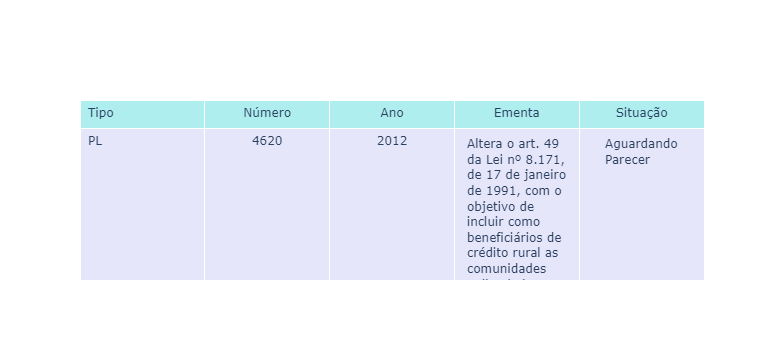

In [101]:

    
    fig = go.Figure(data=[go.Table(
    header=dict(values=list(new_df.columns),
                fill_color='paleturquoise',
                align=['left','center']),
    cells=dict(values=[new_df.Tipo, new_df.Número, new_df.Ano, new_df.Ementa, new_df.Situação],
               fill_color='lavender',
               align=['left', 'center']))
])

fig.show()

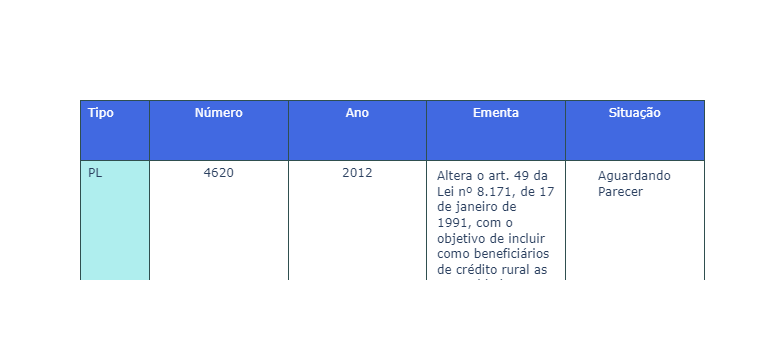

In [102]:
fig = go.Figure(data=[go.Table(
  columnwidth = [300,600],
  header = dict(
    values=list(new_df.columns),
    line_color='darkslategray',
    fill_color='royalblue',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=60,
  ),
  cells=dict(
    values=[new_df.Tipo, new_df.Número, new_df.Ano, new_df.Ementa, new_df.Situação],
    line_color='darkslategray',
    fill=dict(color=['paleturquoise', 'white']),
    align=['left', 'center'],
    font_size=12,
    height=60)
    )
])

fig.show()